In [5]:
#Part 1.have a glance on dataset
#import useful packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#prevent possible warnings
import warnings
warnings.filterwarnings('ignore')  
pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [6]:
#read the dataset into Jupiter book
data_df = pd.read_csv(r"C:\Users\zhang\Desktop\creditcard.csv")
print(data_df.shape)
data_df.head()


(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [6]:
#change time scale
data_df['Hour'] = data_df['Time'].apply(lambda x:divmod(x,3600)[0])
data_df.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
22239,32122.0000,-1.6865,1.9851,0.6015,-0.1545,-0.3699,-1.0823,0.5409,0.1784,0.5195,...,-0.7507,-0.0001,0.3123,0.0002,0.0094,-0.0764,-0.4452,8.9900,0,8.0000
142439,84718.0000,-1.2272,0.6112,1.2443,1.3417,0.5528,-0.3228,0.0430,0.4608,-0.7567,...,0.2567,-0.1985,0.1423,0.0990,-0.2696,0.0562,-0.0478,1.0000,0,23.0000
231516,146793.0000,1.9541,-0.9674,-1.6323,-0.5123,-0.1222,-0.0572,-0.2801,-0.1304,-0.6028,...,0.5114,-0.0962,0.2456,0.2274,-0.0517,-0.0106,-0.0427,111.5000,0,40.0000
266048,162167.0000,-0.5869,0.0488,0.2149,-2.5167,-0.0261,-0.5533,-0.1067,0.5253,0.8683,...,0.0575,0.3192,0.7034,-1.3015,-0.7911,0.1496,0.1428,28.0000,0,45.0000
217410,140878.0000,2.3543,-1.3117,-1.4128,-1.9008,-0.5599,0.0270,-1.0409,-0.1402,-1.5596,...,-0.0069,0.0357,-1.3740,0.0197,-0.0990,0.0102,-0.0731,15.0000,0,39.0000


In [9]:
x_feature = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Hour']
# build up the Independent variable and dependent variable[x,y]
X = data_df[x_feature]
y = data_df["Class"]


In [10]:
data_df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

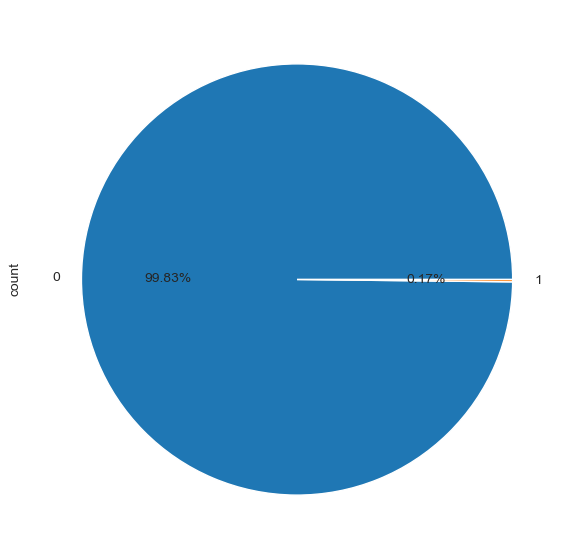

In [37]:
# visualize the 0-1 varaibles using circle plot
fig, axs = plt.subplots(1,1,figsize=(14,7))
data_df['Class'].value_counts().plot(x=None,y=None, kind='pie', autopct='%1.2f%%')
plt.show()


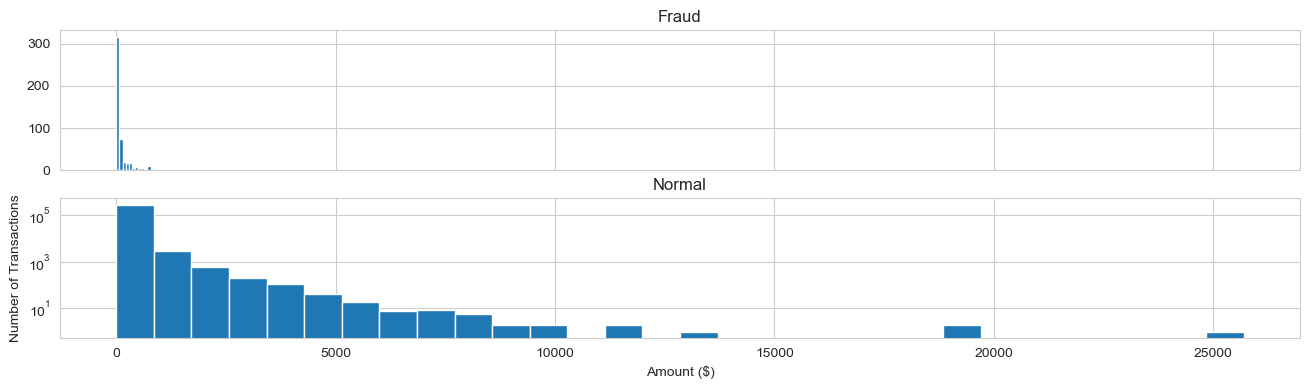

In [15]:
#visualize the fraud and normal catagories
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))
bins = 30
ax1.hist(data_df["Amount"][data_df["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_df["Amount"][data_df["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [12]:
# get the class of the data
fraud = data_df[data_df['Class'] == 1]
nonFraud = data_df[data_df['Class'] == 0]

# calculate the correlance
correlationNonFraud = nonFraud.loc[:, data_df.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, data_df.columns != 'Class'].corr()

mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True


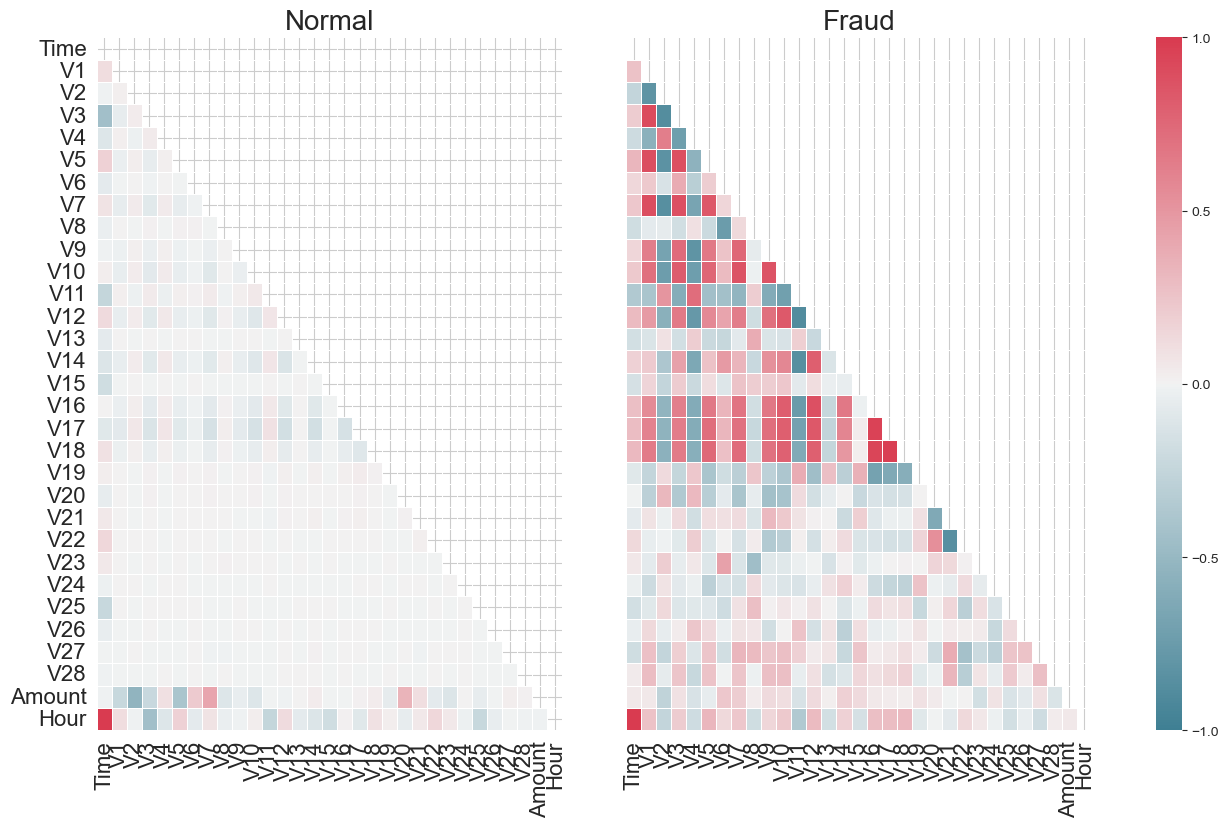

In [13]:
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# normal relevance
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

# fraud relevance
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);


In [41]:
#part 2 using LASSO to minimize unuseful varables to 0
# divide Characteristic variables and Target variable

data=pd.read_csv(r"C:\Users\zhang\Desktop\creditcard.csv")
X = data.drop(columns=['Class'])  # Characteristic variables

y = data['Class']  # Target variable


# standardlize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split train and test class
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
# traing LASSO
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # give a mostly used c in variable choosing
lasso_model.fit(X_train, y_train)

# do prediction
y_pred = lasso_model.predict(X_test)

# assess the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9991397773954567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
# grasp the importance of the traits
lasso_coefficients = lasso_model.coef_[0]  
selected_features = X.columns[lasso_coefficients != 0]  
removed_features = X.columns[lasso_coefficients == 0]  

print("🌟 chosed traits: ", list(selected_features))
print("🛑 deleted traits: ", list(removed_features))


🌟 chosed traits:  ['V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27', 'V28', 'Amount']
🛑 deleted traits:  ['Time', 'V1', 'V2', 'V3', 'V7', 'V11', 'V12', 'V18', 'V19', 'V24', 'V26']


In [44]:
# drop the 'delete traits'
droplist = ['Time', 'V1', 'V2', 'V3', 'V7', 'V11', 'V12', 'V18', 'V19', 'V24', 'V26']
data_df_new = data_df.drop(droplist, axis = 1)
print(data_df_new.shape) 
data_df_new.tail()


(284807, 20)


,V4,V5,V6,V8,V9,V10,V13,V14,V15,V16,V17,V20,V21,V22,V23,V25,V27,V28,Amount,Class
284802,-2.0667,-5.3645,-2.6068,7.3053,1.9144,4.3562,-0.6893,4.6269,-0.9245,1.1076,1.9917,1.4758,0.2135,0.1119,1.0145,1.4368,0.9437,0.8237,0.7700,0
284803,-0.7386,0.8682,1.0584,0.2949,0.5848,-0.9759,1.2148,-0.6751,1.1649,-0.7118,-0.0257,0.0596,0.2142,0.9244,0.0125,-0.6066,0.0685,-0.0535,24.7900,0
284804,-0.5578,2.6305,3.0313,0.7084,0.4325,-0.4848,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.0014,0.2320,0.5782,-0.0375,0.2657,0.0045,-0.0266,67.8800,0
284805,0.6898,-0.3780,0.6237,0.6791,0.3921,-0.3991,-1.0421,0.4496,1.9626,-0.6086,0.5099,0.1274,0.2652,0.8000,-0.1633,-0.5692,0.1088,0.1045,10.0000,0
284806,-0.5063,-0.0125,-0.6496,-0.4147,0.4862,-0.9154,-0.1881,-0.0843,0.0413,-0.3026,-0.6604,0.3829,0.2611,0.6431,0.3768,-0.4736,-0.0024,0.0136,217.0000,0


In [46]:
#part 3.using logistic regression to do binary classification
#giving x_feature
x_feature=['V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27', 'V28', 'Amount']
X = data_df[x_feature]
y = data_df["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('overall：{}; positive{:.2%}; negative{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('dimensions：', X.shape[1])


overall：284807; positive0.17%; negative99.83%
dimensions： 19


In [47]:
from imblearn.over_sampling import SMOTE # using SMOTE to balance the 0 and 1 variables
sm = SMOTE(random_state=42)   
X, y = sm.fit_resample(X, y)
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('overall：{}; positive{:.2%}; negative{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('dimension：', X.shape[1])


overall：568630; positive50.00%; negative50.00%
dimension： 19


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size= 0.3,random_state=42)


In [49]:
# train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, y_train)

# prediction
y_pred = lr.predict(X_test)

# model assessment
from sklearn.metrics import confusion_matrix,classification_report
print('<--------Confusion Matrix-------->\n',confusion_matrix(y_test,y_pred))
print('<--------Classification Report-------->\n',classification_report(y_test,y_pred))


<--------Confusion Matrix-------->
 [[83368  1927]
 [ 6264 79030]]
<--------Classification Report-------->
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.98      0.93      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



In [21]:
# choose best C-value
param_grid = {'C': [0.1, 1, 10,100],
                            'penalty': [ 'l1', 'l2']}

clf = GridSearchCV(LogisticRegression(),  param_grid, cv=5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [22]:
#see which c is best
clf.best_params_


{'C': 1, 'penalty': 'l2'}

In [23]:
# do predict
y_pred = clf.predict(X_test)

# assessment
from sklearn.metrics import confusion_matrix,classification_report
print('<--------Confusion Matrix-------->\n',confusion_matrix(y_test,y_pred))
print('<--------Classification Report-------->\n',classification_report(y_test,y_pred))


<--------Confusion Matrix-------->
 [[83368  1927]
 [ 6264 79030]]
<--------Classification Report-------->
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85295
           1       0.98      0.93      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



<module 'matplotlib.pyplot' from 'C:\\Users\\zhang\\anaconda3\\envs\\dasc_5410\\Lib\\site-packages\\matplotlib\\pyplot.py'>

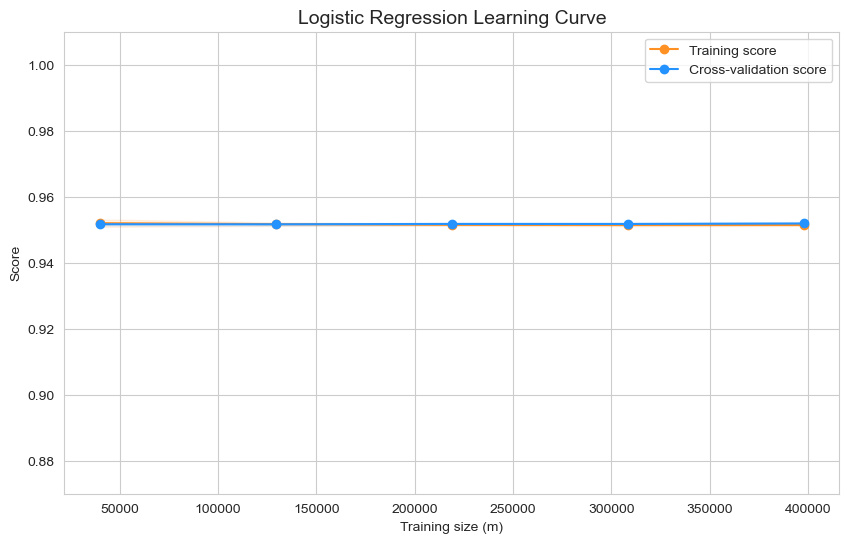

In [24]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import learning_curve
#draw the curve to see the result good or not
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax1 = plt.subplots(1,1, figsize=(10,6), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    return plt

title = "Learning Curves (lr C:10, penalty: l2})"

estimator = LogisticRegression(penalty='l2', C=10.0)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
plot_learning_curve(estimator,  X, y, (0.87, 1.01), cv=cv, n_jobs=4)


In [26]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



threshold:0.1,Recall metric in the testing dataset 0.9803737660327807->83620->85294 
threshold:0.2,Recall metric in the testing dataset 0.9652847797031444->82333->85294 
threshold:0.3,Recall metric in the testing dataset 0.9469130302248693->80766->85294 
threshold:0.4,Recall metric in the testing dataset 0.9353178418177128->79777->85294 
threshold:0.5,Recall metric in the testing dataset 0.9265598987033086->79030->85294 
threshold:0.6,Recall metric in the testing dataset 0.9188688536122119->78374->85294 
threshold:0.7,Recall metric in the testing dataset 0.9117757403803316->77769->85294 
threshold:0.8,Recall metric in the testing dataset 0.9018922784721083->76926->85294 
threshold:0.9,Recall metric in the testing dataset 0.8885384669496096->75787->85294 


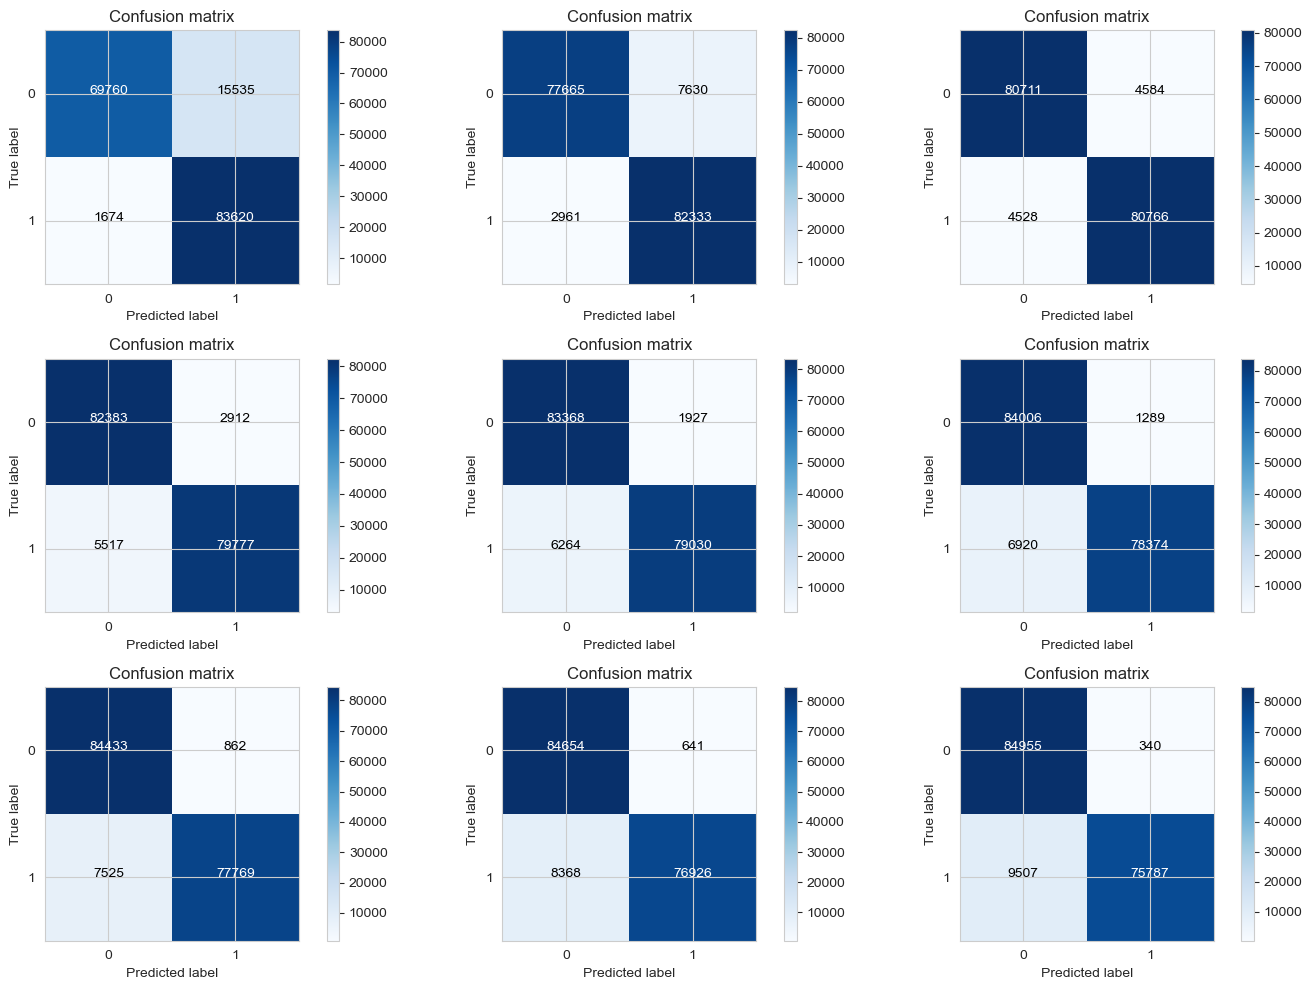

In [27]:

from sklearn.metrics import confusion_matrix


y_pred_proba = clf.predict_proba(X_test)  #predict_prob get a probility of 1
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # set threshold
plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    x1 = cnf_matrix[1,1]
    x2 = (cnf_matrix[1,0]+cnf_matrix[1,1])
    print("threshold:{},Recall metric in the testing dataset {}->{}->{} ".format( i, x1/x2,x1,x2))
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix ,classes=class_names)


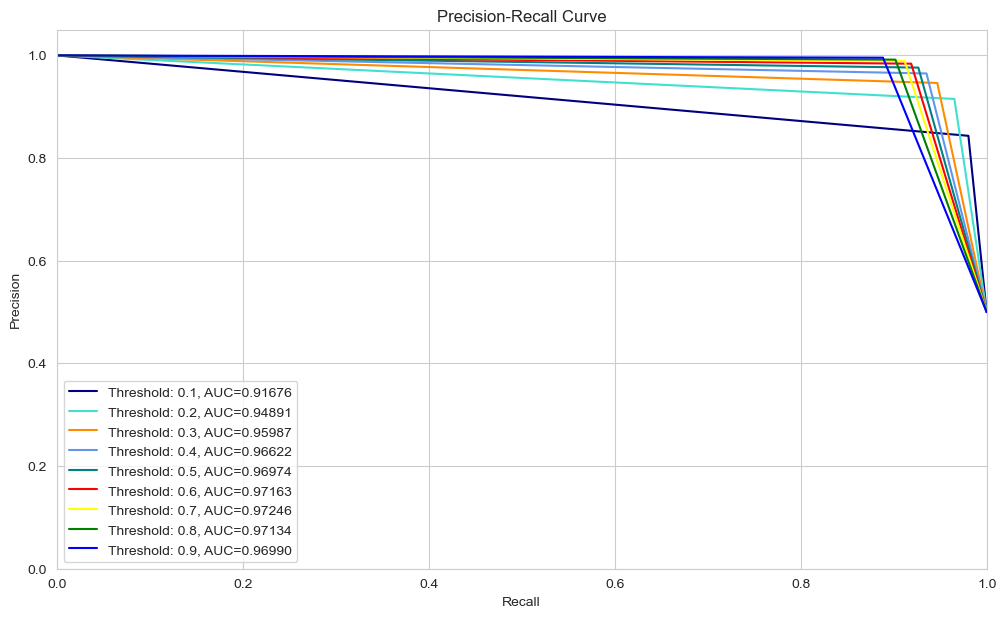

In [28]:
from itertools import cycle

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i 

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)# recall ,precision area
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
